In [45]:
import numpy as np
import pandas as pd
#导入文件
df_ads = pd.read_csv('data1.txt')
df_ads.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


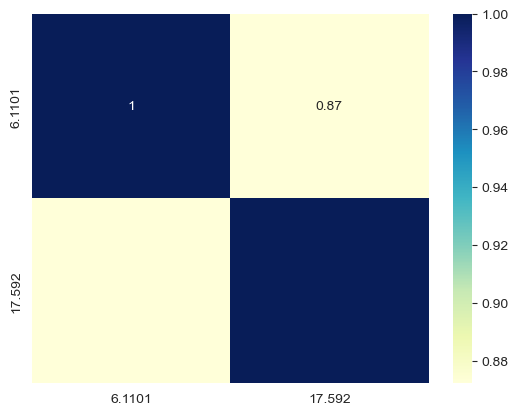

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_ads.corr(),cmap="YlGnBu",annot=True)
plt.show()

     6.1101    17.592        x         y
0    5.5277   9.13020   5.5277   9.13020
1    8.5186  13.66200   8.5186  13.66200
2    7.0032  11.85400   7.0032  11.85400
3    5.8598   6.82330   5.8598   6.82330
4    8.3829  11.88600   8.3829  11.88600
..      ...       ...      ...       ...
91   5.8707   7.20290   5.8707   7.20290
92   5.3054   1.98690   5.3054   1.98690
93   8.2934   0.14454   8.2934   0.14454
94  13.3940   9.05510  13.3940   9.05510
95   5.4369   0.61705   5.4369   0.61705

[96 rows x 4 columns]


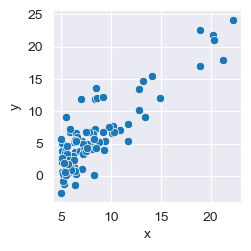

In [44]:
# 选择第一列
x = df_ads.iloc[:, 0]
y = df_ads.iloc[:, 1]
df_ads['x'] = x
df_ads['y'] = y
print(df_ads)
# 现在使用这个新列名作为x_vars
sns.pairplot(df_ads, x_vars='x', y_vars='y')
plt.show()

In [25]:
X = np.array(df_ads.x)
y = np.array(df_ads.y)
print ("张量X的阶:",X.ndim)
print ("张量X的形状:", X.shape)

张量X的阶: 1
张量X的形状: (96,)


In [26]:
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
print(X.shape)
print(y.shape)

(96, 1)
(96, 1)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,random_state=0)

In [28]:
#定义归一化函数，进行数据压缩
def scaler(train,test):
    min = train.min(axis=0)
    max = train.max(axis=0)
    gap = max - min
    train -= min
    train /= gap
    test -=min
    test /= gap
    return train,test

In [29]:
X_train,X_test = scaler(X_train,X_test)
y_train,y_test = scaler(y_train,y_test)
print(X_train.shape)
print(y_train.shape)

(76, 1)
(76, 1)


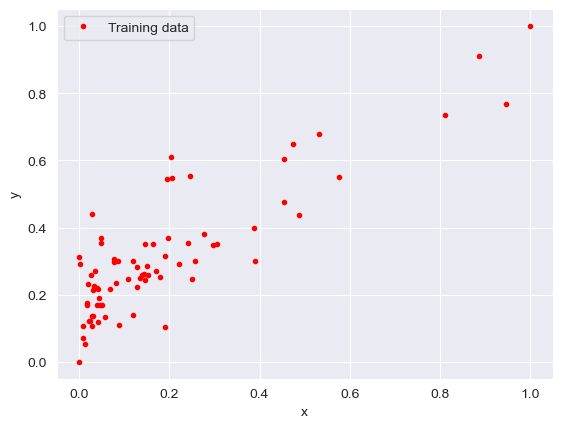

In [30]:
#原数据散点图
plt.plot(X_train,y_train,'r.',label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
#定义一个MSE均方误差函数
def loss_function(X,y,weight,bias):
    y_hat = weight*X + bias
    loss = y_hat - y
    cost = np.sum(loss**2)/(2*len(X))
    return cost

In [32]:
print("当权重为5，偏置3时，损失为：",
      loss_function(X_train,y_train,weight=5,bias=3))
print("当权重100，偏置1时，损失为：",
      loss_function(X_train,y_train,weight=100,bias=1))

当权重为5，偏置3时，损失为： 6.975264007014954
当权重100，偏置1时，损失为： 423.5742955946882


In [33]:
def gradient_descent(X,y,w,b,lr,iter):
    l_history = np.zeros(iter)
    w_history = np.zeros(iter)
    b_history = np.zeros(iter)
    for i in range(iter):
        y_hat = w*X + b
        loss = y_hat -y
        derivative_w = X.T.dot(loss)/len(X)
        derivative_b = sum(loss)*1/len(X)
        w = w - lr*derivative_w
        b = b - lr*derivative_b
        l_history[i] = loss_function(X,y,w,b)
        w_history[i] = w
        b_history[i] = b
    return l_history,w_history,b_history

In [34]:
#初始化参数
iterations = 250;
alpha = 0.5;
weight = -5;
bias = 3
print('当前损失：',loss_function(X_train,y_train,weight,bias))

当前损失： 2.3495519556045292


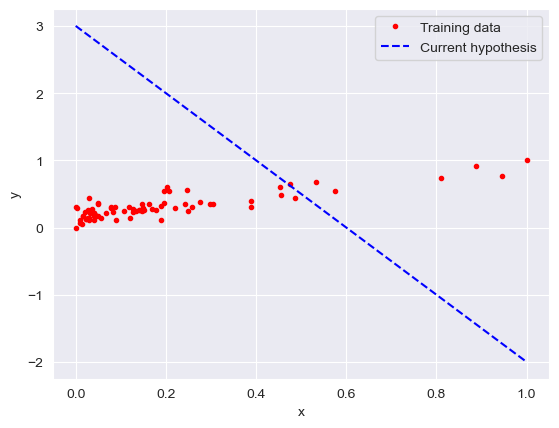

In [35]:
#绘制当前模型
plt.plot(X_train,y_train,'r.',label='Training data')
line_X = np.linspace(X_train.min(),X_train.max(),500)
line_y = [weight*xx + bias
          for xx in line_X]
plt.plot(line_X,line_y,'b--',label='Current hypothesis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [36]:
#训练机器
loss_history,weight_history,bias_history = gradient_descent(
    X_train,y_train,weight,bias,alpha,iterations
)

C:\Users\legion\AppData\Local\Temp\ipykernel_15612\948330770.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_history[i] = w
C:\Users\legion\AppData\Local\Temp\ipykernel_15612\948330770.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_history[i] = b


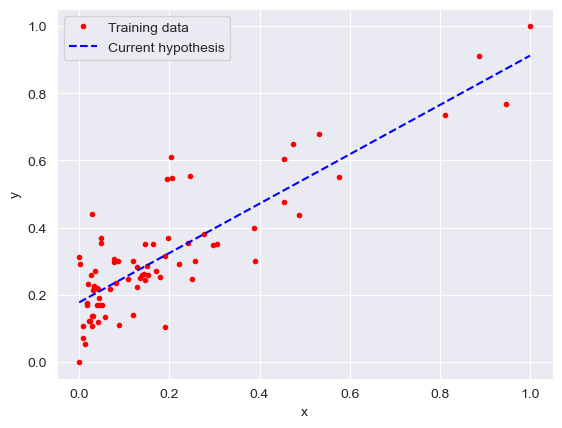

In [37]:
plt.plot(X_train,y_train,'r.',label='Training data')
line_X = np.linspace(X_train.min(),X_train.max(),500)
line_y = [weight_history[-1]*xx + bias_history[-1]
          for xx in line_X]
plt.plot(line_X,line_y,'b--',label='Current hypothesis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

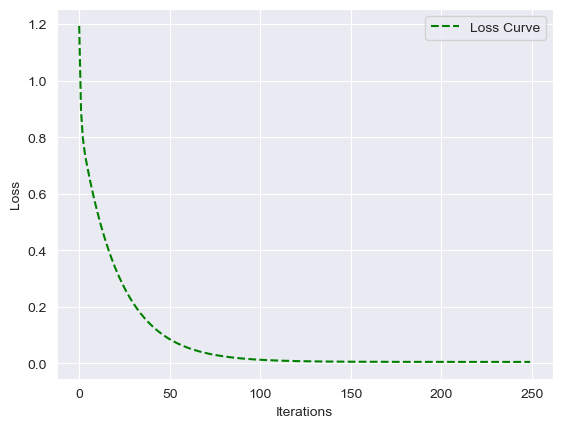

In [38]:
#训练损失函数
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
print('当前损失：',loss_function(X_train,y_train,
                                weight_history[-1],bias_history[-1]))
print('当前权重：',weight_history[-1])
print('当前偏重：',bias_history[-1])

当前损失： 0.0047073922427575765
当前权重： 0.734401791894989
当前偏重： 0.17729972563793345


In [40]:
print('测试机损失：',loss_function(X_test,y_test,
                                  weight_history[-1],bias_history[-1]))

测试机损失： 0.005406296667608874


In [41]:
#预测结果函数
def predict_y(x,weight_optimal,bias_optimal):
    return weight_optimal * x + bias_optimal

In [42]:
#预测结果
print('当x为10时，y为',predict_y(10,weight_history[-1],bias_history[-1]))
print('当x为30时，y为',predict_y(30,weight_history[-1],bias_history[-1]))
print('当x为27时，y为',predict_y(27,weight_history[-1],bias_history[-1]))
print('当x为120时，y为',predict_y(120,weight_history[-1],bias_history[-1]))

当x为10时，y为 7.521317644587823
当x为30时，y为 22.209353482487604
当x为27时，y为 20.006148106802637
当x为120时，y为 88.30551475303662
